In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
import dendrotweaks as dd

In [3]:
from dendrotweaks.morphology.io.reader import SWCReader

In [4]:
import os
path_to_model = os.getcwd()
path_to_data = os.path.dirname(path_to_model)

In [5]:
model = dd.Model(path_to_model)

In [6]:
dd.apply_dark_theme()

# Morphology

In [7]:
model.list_morphologies()

['Poirazi_2003', 'Poirazi_2003_sorted']

In [8]:
model.load_morphology(file_name='Poirazi_2003_sorted')

Sorted PointTree(root=Point(idx=0), num_nodes=5077).
Extended 178 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=5255).


In [9]:
from dendrotweaks.morphology import validate_tree

In [10]:
model.sec_tree.soma.points

[Point(idx=1), Point(idx=0), Point(idx=2)]

In [11]:
validate_tree(model.point_tree)

Checking for unique node ids...
Checking for unique root node...
Checking for duplicate children...
Checking tree connectivity...
Checking for loops...
Checking for bifurcations with more than 2 children...
Checking for NaN values...
Checking for bifurcations in the soma...
Checking the extended tree for geometric continuity...
Checking if the tree is sorted...
***Validation complete.***


In [12]:
validate_tree(model.sec_tree)

Checking for unique node ids...
Checking for unique root node...
Checking for duplicate children...
Checking tree connectivity...
Checking for loops...
Checking for bifurcations with more than 2 children...
Checking that all points in a section belong to the same domain...
Checking that all sections have a non-zero length...
Checking that all sections (except soma) have 0 or 2 children...
Checking that the root section has domain soma...
Checking that points in the point tree match those in the sections...
Checking if the tree is sorted...
***Validation complete.***


In [13]:
model.domains

{'axon': <Domain(axon, 2, #F0E442, 13 sections)>,
 'basal': <Domain(basal, 31, #31A354, 48 sections)>,
 'oblique': <Domain(oblique, 43, #8C564B, 72 sections)>,
 'soma': <Domain(soma, 1, #E69F00, 1 sections)>,
 'trunk': <Domain(trunk, 41, #56B4E9, 25 sections)>,
 'tuft': <Domain(tuft, 42, #A55194, 22 sections)>}

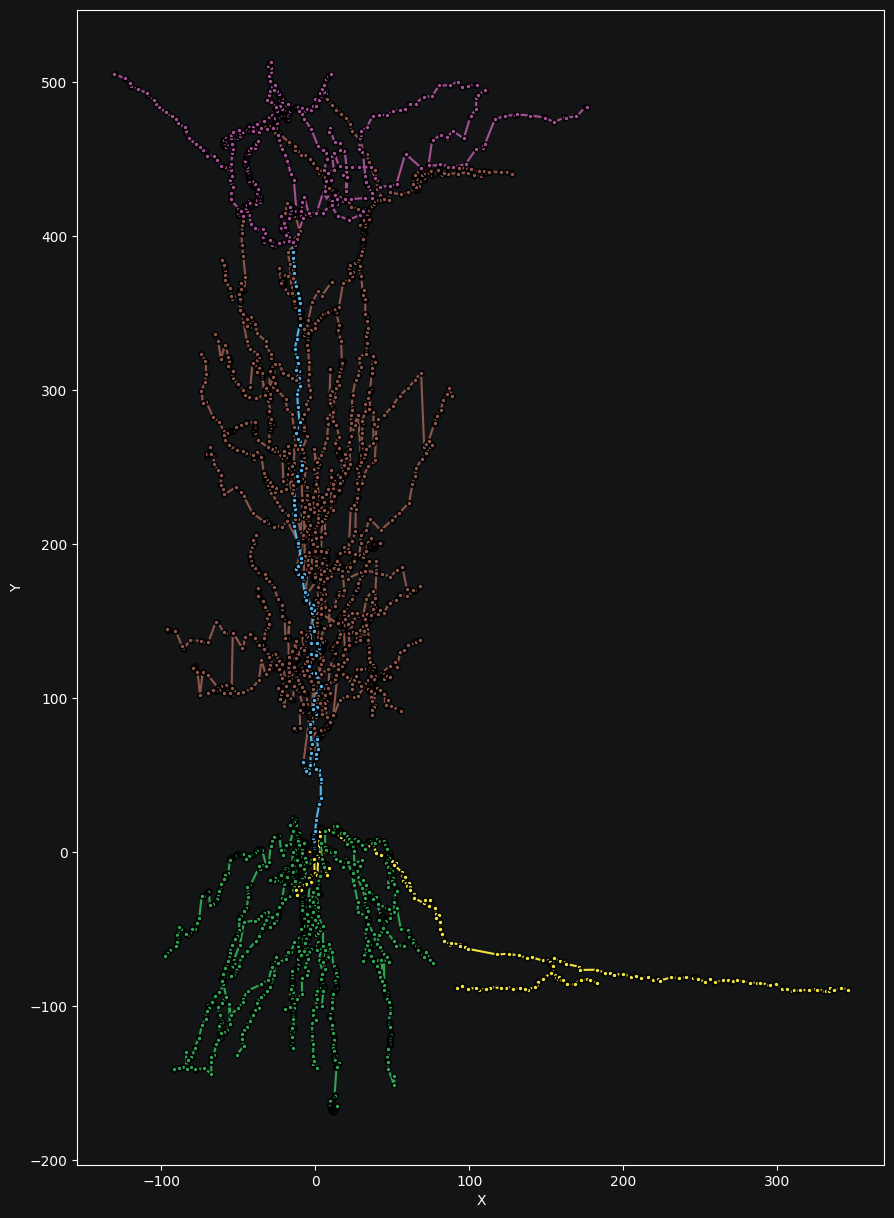

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=False)

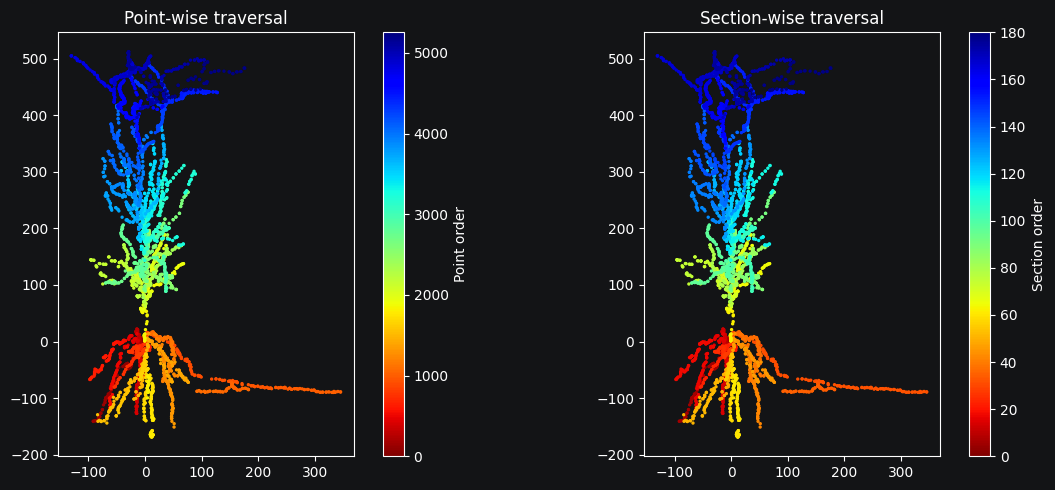

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Point-wise traversal
x, y, colors = [], [], []
for i, point in enumerate(model.point_tree.points):
    x.append(point.x)
    y.append(point.y)
    colors.append(i)

sc0 = ax[0].scatter(x, y, c=colors, s=2, cmap='jet_r')
ax[0].set_title('Point-wise traversal')
ax[0].set_aspect('equal')
plt.colorbar(sc0, ax=ax[0], label='Point order')

# Section-wise traversal
x, y, colors = [], [], []
for i, sec in enumerate(model.sec_tree.sections):
    for point in sec.points:
        x.append(point.x)
        y.append(point.y)
        colors.append(i)

sc1 = ax[1].scatter(x, y, c=colors, s=2, cmap='jet_r')
ax[1].set_title('Section-wise traversal')
ax[1].set_aspect('equal')
plt.colorbar(sc1, ax=ax[1], label='Section order')

plt.tight_layout()
plt.show()

In [15]:
model.export_morphology(file_name='Poirazi_2003_sorted')

Removed 178 overlapping nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=5077).
Extended 178 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=5255).


# Membrane

In [16]:
model.add_default_mechanisms(recompile=False)

In [17]:
model.add_mechanisms(recompile=True)

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/Na_soma.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/cat.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/car.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/h.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/calH.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/nap.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/Kdr_dend.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Poirazi_2003/biophys/python/somacar.py
Saved content to /home/roman/Documents/code/DendroTw

# Groups

In [18]:
model.groups

{'all': SegmentGroup("all", domains=['axon', 'basal', 'oblique', 'soma', 'trunk', 'tuft']),
 'axonal': SegmentGroup("axonal", domains=['axon']),
 'basal': SegmentGroup("basal", domains=['basal']),
 'oblique': SegmentGroup("oblique", domains=['oblique']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'trunk': SegmentGroup("trunk", domains=['trunk']),
 'tuft': SegmentGroup("tuft", domains=['tuft'])}

In [19]:
model.mechanisms

{'Leak': <Mechanism(Leak)>,
 'CaDyn': <Mechanism(CaDyn)>,
 'Na_soma': <Mechanism(Na_soma)>,
 'cat': <Mechanism(cat)>,
 'car': <Mechanism(car)>,
 'h': <Mechanism(h)>,
 'calH': <Mechanism(calH)>,
 'nap': <Mechanism(nap)>,
 'Kdr_dend': <Mechanism(Kdr_dend)>,
 'somacar': <Mechanism(somacar)>,
 'Na_dend': <Mechanism(Na_dend)>,
 'kca': <Mechanism(kca)>,
 'kad': <Mechanism(kad)>,
 'mykca': <Mechanism(mykca)>,
 'Kdr_soma': <Mechanism(Kdr_soma)>,
 'kap': <Mechanism(kap)>,
 'cal': <Mechanism(cal)>,
 'km': <Mechanism(km)>}

In [20]:
def insert_mechanism(mechanism, domains):
    for domain in domains:
        model.insert_mechanism(mechanism, domain, distribute=False)

In [21]:
apical = ['tuft', 'oblique', 'trunk']
insert_mechanism('Leak', model.domains)
# sodium
insert_mechanism('Na_soma', ['soma', 'axon'])
insert_mechanism('nap', ['tuft', 'oblique'])
insert_mechanism('Na_dend', ['basal', *apical])
# potassium
insert_mechanism('Kdr_soma', ['soma', 'axon'])
insert_mechanism('Kdr_dend', ['basal', *apical])
insert_mechanism('km', ['soma', 'axon', *apical])
insert_mechanism('kad', [*apical])
insert_mechanism('kap', ['trunk', 'oblique', 'basal'])
# misc
insert_mechanism('h', ['soma', 'basal', *apical])

In [22]:
# calcium
insert_mechanism('cat', ['soma', *apical])
insert_mechanism('car', [*apical])
insert_mechanism('somacar', ['soma'])
insert_mechanism('cal', ['soma'])
insert_mechanism('calH', [*apical])
# calcium-dependent potassium
insert_mechanism('kca', ['soma', *apical])
insert_mechanism('mykca', ['soma', *apical])
insert_mechanism('CaDyn', ['soma', *apical])

In [23]:
model.distribute_all() # 4.6s

In [24]:
model.domains_to_mechs

{'axon': {'Kdr_soma', 'Leak', 'Na_soma', 'km'},
 'basal': {'Kdr_dend', 'Leak', 'Na_dend', 'h', 'kap'},
 'oblique': {'CaDyn',
  'Kdr_dend',
  'Leak',
  'Na_dend',
  'calH',
  'car',
  'cat',
  'h',
  'kad',
  'kap',
  'kca',
  'km',
  'mykca',
  'nap'},
 'soma': {'CaDyn',
  'Kdr_soma',
  'Leak',
  'Na_soma',
  'cal',
  'cat',
  'h',
  'kca',
  'km',
  'mykca',
  'somacar'},
 'trunk': {'CaDyn',
  'Kdr_dend',
  'Leak',
  'Na_dend',
  'calH',
  'car',
  'cat',
  'h',
  'kad',
  'kap',
  'kca',
  'km',
  'mykca'},
 'tuft': {'CaDyn',
  'Kdr_dend',
  'Leak',
  'Na_dend',
  'calH',
  'car',
  'cat',
  'h',
  'kad',
  'kca',
  'km',
  'mykca',
  'nap'}}

# Parameters

In [25]:
# 0 - 50 - 300 - 350 - ...
model.add_group('proximal_apical', domains=['oblique', 'tuft'], 
    select_by='domain_distance', max_value=50)
model.add_group('medial_apical', domains=['oblique', 'tuft'], 
    select_by='domain_distance', min_value=50, max_value=300)
model.add_group('distal_apical', domains=['oblique', 'tuft'], 
    select_by='domain_distance', min_value=300, max_value=350)
model.add_group('tips', domains=['oblique', 'tuft'], 
    select_by='domain_distance', min_value=350)
model.add_group('non_trunk', domains=['oblique', 'tuft'])

In [26]:
model.add_group('trunk_less_50', domains=['trunk'], 
    select_by='domain_distance', max_value=144)
model.add_group('trunk_more_50', domains=['trunk'], 
    select_by='domain_distance', min_value=144)
model.add_group('trunk_less_100', domains=['trunk'], 
    select_by='domain_distance', max_value=284)
model.add_group('trunk_more_100', domains=['trunk'], 
    select_by='domain_distance', min_value=284)
model.add_group('trunk_50_200', domains=['trunk'], 
    select_by='domain_distance', min_value=144, max_value=506)
model.add_group('trunk_more_200', domains=['trunk'], 
    select_by='domain_distance', min_value=506)
model.add_group('trunk_more_350', domains=['trunk'], 
    select_by='domain_distance', min_value=752)
model.add_group('trunk_100_350', domains=['trunk'], 
    select_by='domain_distance', min_value=284, max_value=752)

In [27]:
model.groups

{'all': SegmentGroup("all", domains=['axon', 'basal', 'oblique', 'soma', 'trunk', 'tuft']),
 'axonal': SegmentGroup("axonal", domains=['axon']),
 'basal': SegmentGroup("basal", domains=['basal']),
 'oblique': SegmentGroup("oblique", domains=['oblique']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'trunk': SegmentGroup("trunk", domains=['trunk']),
 'tuft': SegmentGroup("tuft", domains=['tuft']),
 'proximal_apical': SegmentGroup("proximal_apical", domains=['oblique', 'tuft'], domain_distance(None, 50)),
 'medial_apical': SegmentGroup("medial_apical", domains=['oblique', 'tuft'], domain_distance(50, 300)),
 'distal_apical': SegmentGroup("distal_apical", domains=['oblique', 'tuft'], domain_distance(300, 350)),
 'tips': SegmentGroup("tips", domains=['oblique', 'tuft'], domain_distance(350, None)),
 'non_trunk': SegmentGroup("non_trunk", domains=['oblique', 'tuft']),
 'trunk_less_50': SegmentGroup("trunk_less_50", domains=['trunk'], domain_distance(None, 144)),
 'trunk_more_50':

In [28]:
model.conductances

{'gbar_Leak': {'all': constant({'value': 0.0})},
 'gbar_Na_soma': {'all': constant({'value': 0})},
 'gbar_nap': {'all': constant({'value': 0})},
 'gbar_Na_dend': {'all': constant({'value': 0})},
 'gbar_Kdr_soma': {'all': constant({'value': 0})},
 'gbar_Kdr_dend': {'all': constant({'value': 0})},
 'gbar_km': {'all': constant({'value': 0})},
 'gbar_kad': {'all': constant({'value': 0})},
 'gbar_kap': {'all': constant({'value': 0})},
 'gbar_h': {'all': constant({'value': 0.0})},
 'gbar_cat': {'all': constant({'value': 0})},
 'gbar_car': {'all': constant({'value': 0})},
 'gbar_somacar': {'all': constant({'value': 0})},
 'gbar_cal': {'all': constant({'value': 0})},
 'gbar_calH': {'all': constant({'value': 0})},
 'gbar_kca': {'all': constant({'value': 0.0})},
 'gbar_mykca': {'all': constant({'value': 0.0})}}

In [29]:
model.set_param('Ra', value=50)
model.set_param('Ra', group_name='trunk',
                distr_type='sigmoid',
                vertical_shift = 34.7387906793,
                scale_factor = 14.6740500337,
                growth_rate = -0.0117912091,
                horizontal_shift = 533.9617117381)

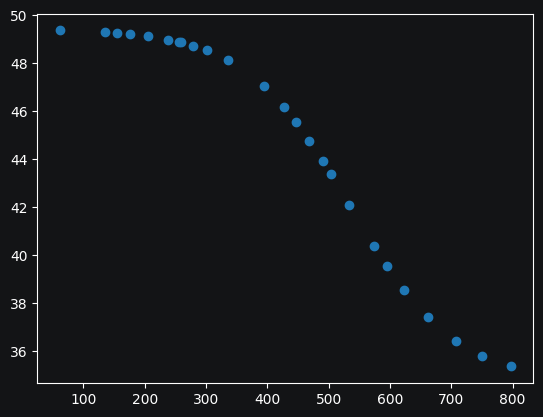

In [30]:
Ra = np.array([sec.Ra for sec in model.domains['trunk'].sections])
dist = np.array([sec(0.5).path_distance() for sec in model.domains['trunk'].sections])

plt.plot(dist, Ra, 'o')

In [31]:
factor = 1  # Controls the Ih channel conductance: 1 for normal model, 0.2 for Ih channel block as in Poirazi 2003 paper

In [32]:
# SOMA
model.set_param('gbar_Leak', group_name='somatic', value=0.000005)
model.set_param('gbar_Na_soma', group_name='somatic', value=0.007)
model.set_param('gbar_Kdr_soma', group_name='somatic', value=0.007 / 5)
model.set_param('gbar_km', group_name='somatic', value=0.06*1e-4)
model.set_param('gbar_h', group_name='somatic', value=1.872e-5 * factor)
model.set_param('gbar_kap', group_name='somatic', value=0.0075)
model.set_param('gbar_cal', group_name='somatic', value=0.014/2)
model.set_param('gbar_cat', group_name='somatic', value=0.0001/2)
model.set_param('gbar_somacar', group_name='somatic', value=0.003)
model.set_param('gbar_kca', group_name='somatic', value=5*0.0001)
model.set_param('gbar_mykca', group_name='somatic', value=5.5*1.1*0.015)

In [33]:
# AXON
model.set_param('gbar_Leak', group_name='axonal', value=0.000005)
model.set_param('gbar_Na_soma', group_name='axonal', value=0.1)
model.set_param('gbar_Kdr_soma', group_name='axonal', value=0.1/5)
model.set_param('gbar_km', group_name='axonal', value=0.5*0.06*1e-4)

In [34]:
# TRUNK
model.set_param('gbar_Leak', group_name='trunk', distr_type='sigmoid',
                vertical_shift=0.0000061767, #5e-6
                scale_factor=0.0000678359,#7.83e-5,
                growth_rate=0.0165226338,#0.02,
                horizontal_shift=698.1859945614) #340.7
model.set_param('gbar_Na_dend', group_name='trunk', value=0.007)
model.set_param('gbar_Kdr_dend', group_name='trunk', value=0.007 / (10.0 / 1.24))
model.set_param('gbar_km', group_name='trunk', value=0.06*1e-4)

# h
model.set_param('gbar_h', group_name='trunk', distr_type='sigmoid',
                vertical_shift=0.0000213668 * factor, #soma_hbar
                scale_factor=0.0001438707 * factor, #soma_hbar*9 - soma_hbar
                growth_rate= 0.0145830395, #1/50,
                horizontal_shift=629.7203582338) #280)

# kap
model.set_param('gbar_kap', group_name='trunk_less_100', value=0.0075)

# kad
model.set_param('gbar_kad', group_name='trunk_100_350', distr_type='linear',
                slope=0.0000794365, intercept=-0.0114795265)
model.set_param('gbar_kad', group_name='trunk_more_350', value=6.5*1.04*0.0072)

# kca
model.set_param('gbar_kca', group_name='trunk_less_50', value=0.5*0.0001)
model.set_param('gbar_kca', group_name='trunk_50_200', value=5*0.0001)
model.set_param('gbar_kca', group_name='trunk_more_200', value=0.5*0.0001)

model.set_param('gbar_mykca', group_name='trunk_less_50', value=0.25*1.1*0.015)
model.set_param('gbar_mykca', group_name='trunk_50_200', value=2*1.1*0.015)
model.set_param('gbar_mykca', group_name='trunk_more_200', value=0.25*1.1*0.015)

# cat
# model.set_param('gbar_cat', group_name='trunk_less_100', value=???)
model.set_param('gbar_cat', group_name='trunk_more_100', distr_type='linear',
intercept=-0.0001041345, slope=0.0000006745)

# car
model.set_param('gbar_car', group_name='trunk_less_100', value=0.1*0.0003)

# calH
model.set_param('gbar_calH', group_name='trunk_less_50', value=0.1*0.95*0.000333)
model.set_param('gbar_calH', group_name='trunk_more_50', value=4.6*0.95*0.000333)

In [35]:
nexus = model.sec_tree[120] #[75] #[86]

hold_leak = nexus(0.5).get_param_value('gbar_Leak')
hold_nap = 0.0004*0.007
hold_cat = nexus(0.5).get_param_value('gbar_cat')
hold_h = nexus(0.5).get_param_value('gbar_h')
hold_kdr = nexus(0.5).get_param_value('gbar_Kdr_dend')
hold_kap = nexus(0.5).get_param_value('gbar_kap')
hold_kad = nexus(0.5).get_param_value('gbar_kad')
hold_mykca = nexus(0.5).get_param_value('gbar_mykca')
hold_kca = nexus(0.5).get_param_value('gbar_kca')
hold_km = nexus(0.5).get_param_value('gbar_km')

In [36]:
# NON-TRUNK

model.set_param('gbar_Na_dend', group_name='non_trunk', value=0.007)

model.set_param('gbar_Leak', group_name='proximal_apical', distr_type='inherit')
model.set_param('gbar_nap', group_name='proximal_apical', value=0.2*hold_nap)
model.set_param('gbar_Kdr_dend', group_name='proximal_apical', value=0.007/(10.0 / 1.24))
model.set_param('gbar_kap', group_name='proximal_apical', distr_type='inherit')
model.set_param('gbar_kad', group_name='proximal_apical', distr_type='inherit')
model.set_param('gbar_h', group_name='proximal_apical', distr_type='inherit')
model.set_param('gbar_km', group_name='proximal_apical', distr_type='inherit')
model.set_param('gbar_kca', group_name='proximal_apical', distr_type='inherit')
model.set_param('gbar_mykca', group_name='proximal_apical', value=1.1*0.015)
model.set_param('gbar_cat', group_name='proximal_apical', distr_type='inherit')
model.set_param('gbar_car', group_name='proximal_apical', distr_type='inherit')
model.set_param('gbar_calH', group_name='proximal_apical', distr_type='inherit')

model.set_param('gbar_Leak', group_name='medial_apical', value=hold_leak)
model.set_param('gbar_nap', group_name='medial_apical', value=hold_nap)
model.set_param('gbar_Kdr_dend', group_name='medial_apical', value=0.007/ (10.0 / 1.24))
model.set_param('gbar_kap', group_name='medial_apical', value=hold_kap)
model.set_param('gbar_kad', group_name='medial_apical', value=1.25*hold_kad)
model.set_param('gbar_h', group_name='medial_apical', value=hold_h)
model.set_param('gbar_km', group_name='medial_apical', value=2*hold_km)
model.set_param('gbar_kca', group_name='medial_apical', value=hold_kca)
model.set_param('gbar_mykca', group_name='medial_apical', value=1.1*0.015)
model.set_param('gbar_cat', group_name='medial_apical', value=hold_cat)
model.set_param('gbar_car', group_name='medial_apical', value=0.0003)
model.set_param('gbar_calH', group_name='medial_apical', value=0.95*0.000333)

# DISTAL_APICAL
model.set_param('gbar_Leak', group_name='distal_apical', value=hold_leak)
model.set_param('gbar_nap', group_name='distal_apical', value=0.0004*0.007)
model.set_param('gbar_Kdr_dend', group_name='distal_apical', value=1.07*hold_kdr)
model.set_param('gbar_kap', group_name='distal_apical', value=hold_kap)
model.set_param('gbar_kad', group_name='distal_apical', value=1.3*1.9*hold_kad)
model.set_param('gbar_h', group_name='distal_apical', value=hold_h)
model.set_param('gbar_km', group_name='distal_apical', value=2*hold_km)
model.set_param('gbar_kca', group_name='distal_apical', value=5*0.0001)
model.set_param('gbar_mykca', group_name='distal_apical', value=1.1*0.015)
model.set_param('gbar_cat', group_name='distal_apical', value=hold_cat)
model.set_param('gbar_car', group_name='distal_apical', value=13*0.0003)
model.set_param('gbar_calH', group_name='distal_apical', value=14*0.95*0.000333)

# TIPS
model.set_param('gbar_Leak', group_name='tips', value=hold_leak)
model.set_param('gbar_nap', group_name='tips', value=2*hold_nap)
model.set_param('gbar_Kdr_dend', group_name='tips', value=1.07*hold_kdr)
model.set_param('gbar_kad', group_name='tips', value=1.3*1.9*hold_kad)
model.set_param('gbar_h', group_name='tips', value=hold_h)
model.set_param('gbar_km', group_name='tips', value=2*hold_km)
model.set_param('gbar_kca', group_name='tips', value=5*0.0001)
model.set_param('gbar_car', group_name='tips', value=13*0.0003)
model.set_param('gbar_calH', group_name='tips', value=15*0.95*0.000333)



In [37]:
# BASAL
sec = model.sec_tree[76] # [65]
hold_kap = sec(0.5).get_param_value('gbar_kap')
hold_kad = sec(0.5).get_param_value('gbar_kad')
hold_leak = sec(0.5).get_param_value('gbar_Leak')

model.set_param('gbar_Leak', group_name='basal', value=hold_leak)
model.set_param('gbar_Na_dend', group_name='basal', value=0.007)
model.set_param('gbar_Kdr_dend', group_name='basal', value=0.007 / (10.0 / 1.24))
model.set_param('gbar_kap', group_name='basal', value=1.6*hold_kap)
# model.set_param('gbar_kad', group_name='basal', value=1.6*hold_kad)
model.set_param('gbar_h', group_name='basal', value=1.872e-5 * factor)

In [38]:
model.set_param('K_h', group_name='somatic', value=8.8)
model.set_param('vhalf_h', group_name='somatic', value=-82)

In [39]:
model.set_param('depth_CaDyn', value=0.1)
model.set_param('taur_CaDyn', value=28.57)
model.set_param('cainf_CaDyn', value=1e-4)
model.set_param('gamma_CaDyn', value=0.0556)
model.set_param('kt_CaDyn', value=0.0)
model.set_param('kd_CaDyn', value=0.0)

In [40]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,Ra,all,constant,{'value': 50}
2,Independent,Ra,trunk,sigmoid,"{'vertical_shift': 34.7387906793, 'scale_facto..."
3,Independent,ena,all,constant,{'value': 50}
4,Independent,ek,all,constant,{'value': -77}
...,...,...,...,...,...
118,CaDyn,taur_CaDyn,all,constant,{'value': 28.57}
119,CaDyn,cainf_CaDyn,all,constant,{'value': 0.0001}
120,CaDyn,gamma_CaDyn,all,constant,{'value': 0.0556}
121,CaDyn,kt_CaDyn,all,constant,{'value': 0.0}


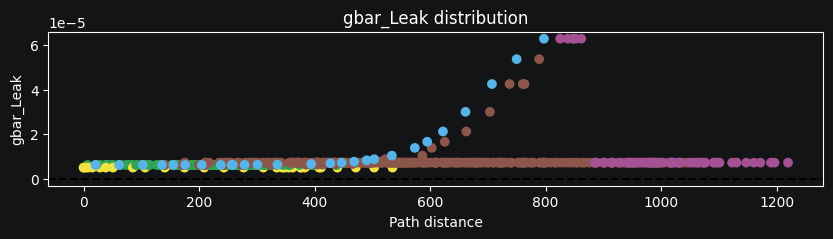

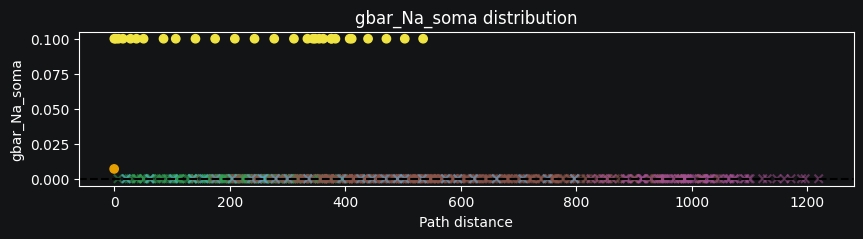

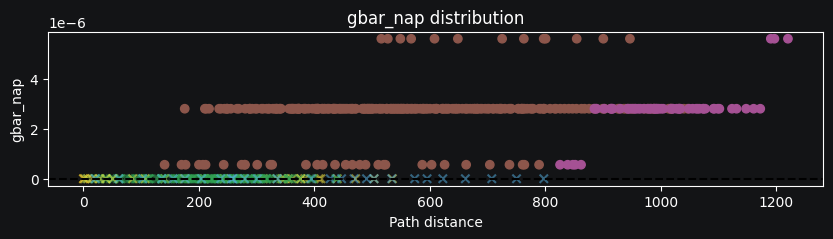

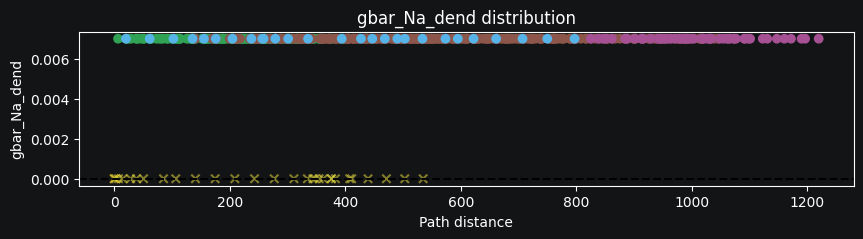

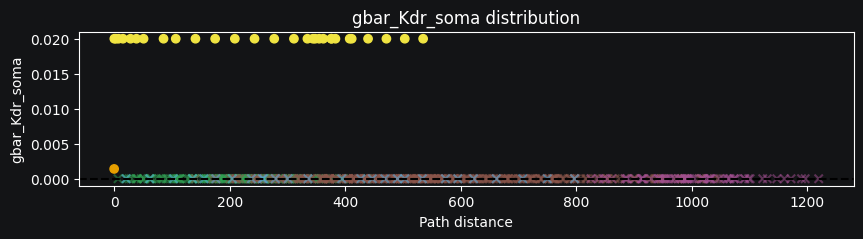

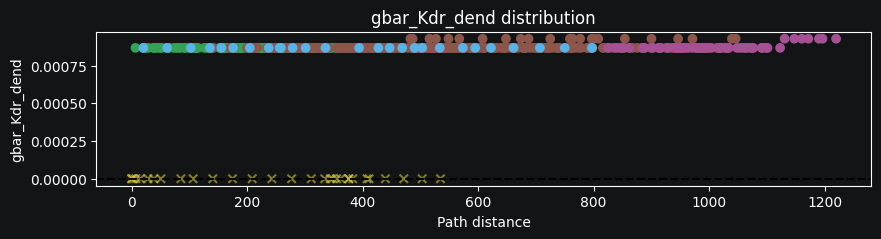

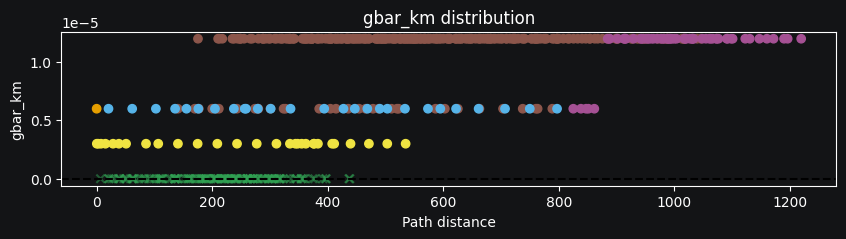

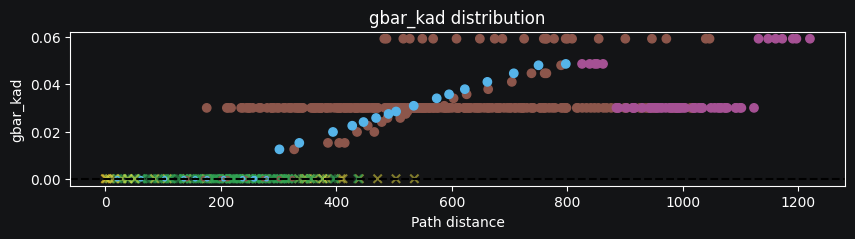

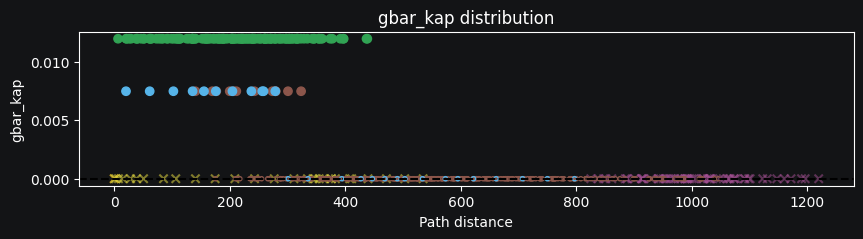

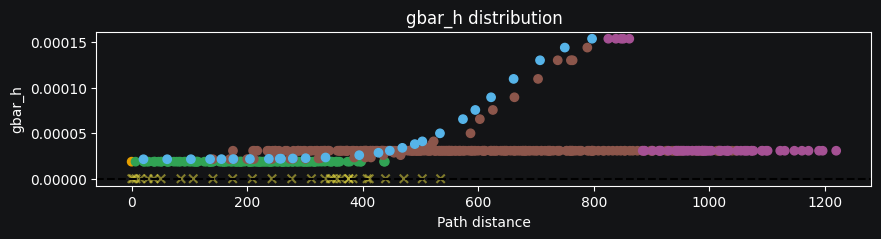

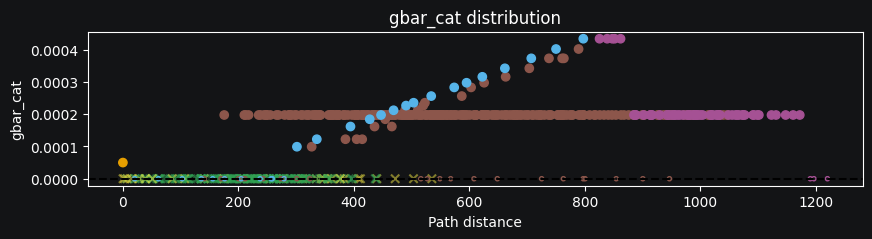

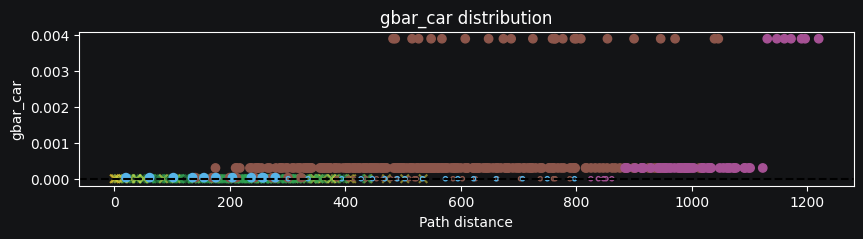

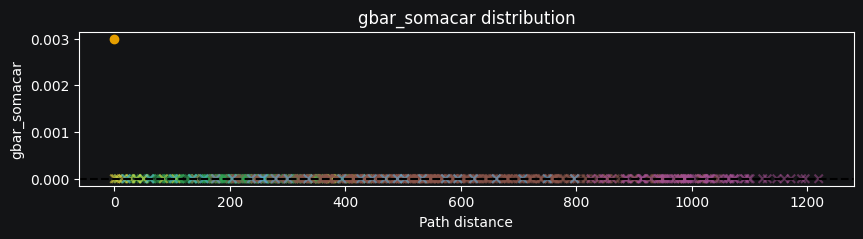

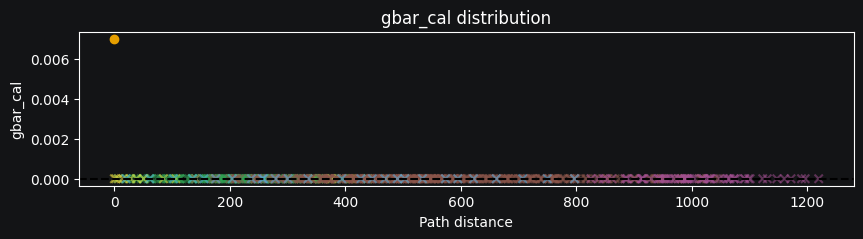

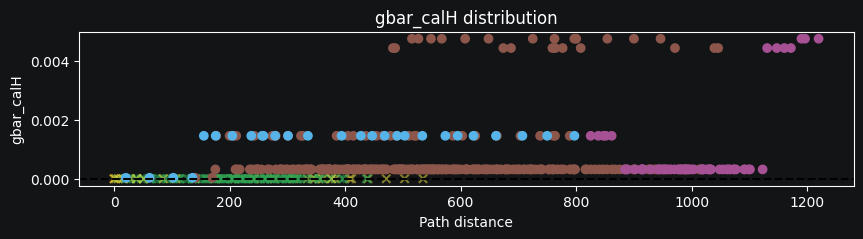

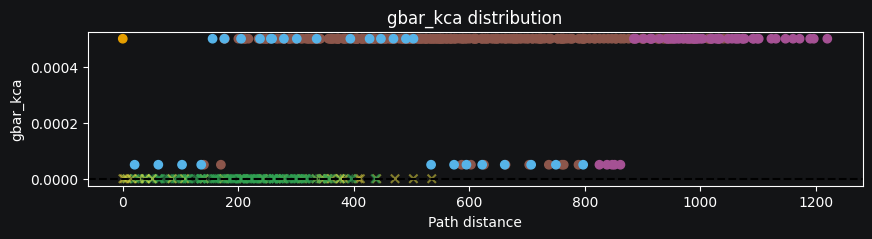

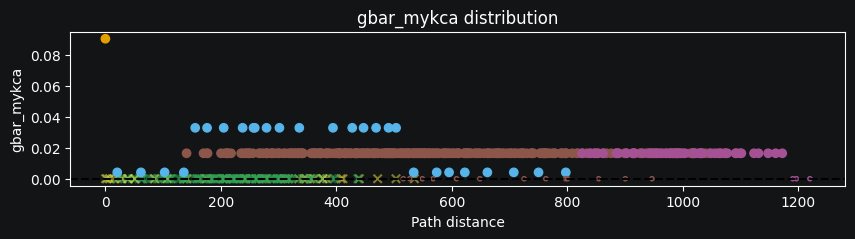

In [41]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax, show_nan=True)

In [42]:
model.set_param('e_Leak', value=-70)
model.set_param('ena', value=50)
model.set_param('ek', value=-80)
model.set_param('eca', value=120)
model.set_param('temperature', value=34)
model.set_param('v_init', value=-70)

In [43]:
if factor == 1:
    model.export_biophys(file_name='Poirazi_2003_full')
else:
    model.export_biophys(file_name='Poirazi_2003_full_Ih_blocked')

# Simulation

In [44]:
soma = model.sec_tree.soma
soma

NeuronSection(idx=0)

In [45]:
model.simulator.dt = 0.025

In [46]:
model.remove_all_stimuli()
model.remove_all_recordings()

In [47]:
model.add_recording(soma, loc=0.5)
model.add_iclamp(soma, loc=0.5, amp=0.22, delay=100, dur=700)

In [48]:
from dendrotweaks.analysis import detect_somatic_spikes, plot_somatic_spikes

Detected 27 spikes
Average spike half-width: 1.75 ms
Average spike amplitude: 88.72 mV
Spike frequency: 38.57 Hz


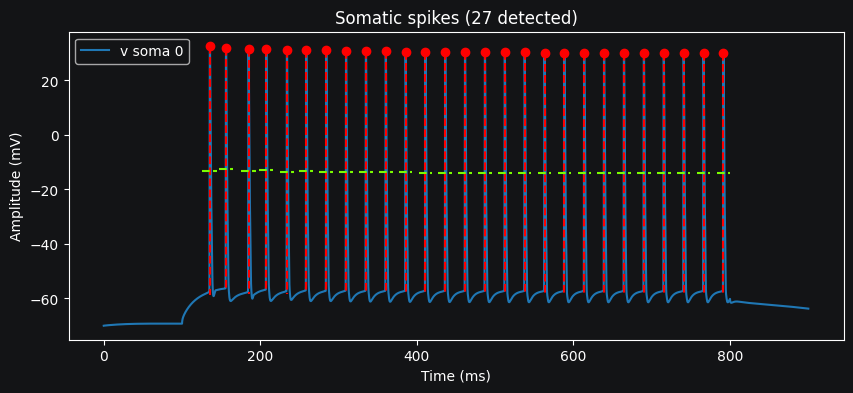

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
model.simulator.run(900);
model.simulator.plot_voltage(ax=ax)
spike_data = detect_somatic_spikes(model)
plot_somatic_spikes(spike_data, ax, show_metrics=True)

In [50]:
model.export_stimuli(file_name='depolarizing_current')

In [51]:
from dendrotweaks.analysis import plot_fI_curve, calculate_fI_curve

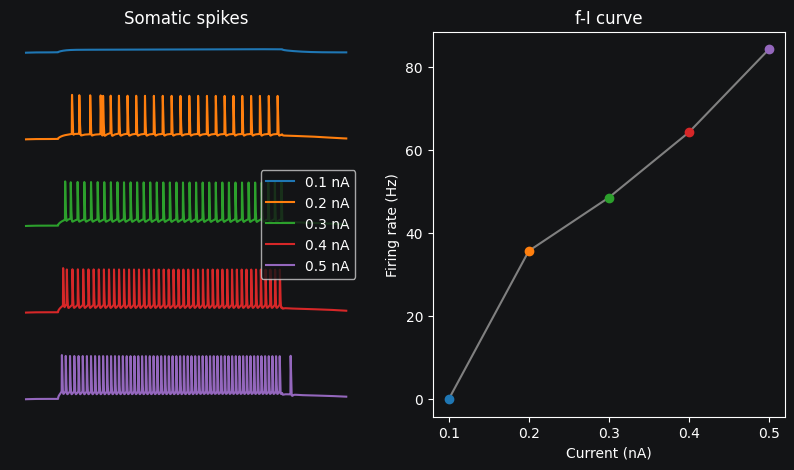

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fi_data = calculate_fI_curve(model, min_amp=0.1, max_amp=0.5, n=5)
plot_fI_curve(fi_data, ax) 

In [53]:
model.load_stimuli(file_name='hyperpolarizing_soma_dend_for_Ih')
model.export_stimuli(file_name='hyperpolarizing_soma_dend_for_Ih')